In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
type = "dev"

df = pd.read_csv(f'../../data/processed_filtered/shakespeare/shakespeare_{type}_cross_predict_paraphrases.csv')
df.head()

,text,label,paraphrased1,paraphrased2,paraphrased3,pred_shakespeare_orig,pred_shakespeare_paraphrased1,pred_shakespeare_paraphrased2,pred_shakespeare_paraphrased3
0,"But thus, I trust, you will not marry her.",1,I'm sure you won't marry her.,but I'm sure you won't marry her.,so I'm sure you won't marry her.,0.821566,0.004811,0.004740,0.004765
1,Stand from the hearse.,1,stand in front of the hearse!,stand out of the hearse!,stand by the hearse!,0.631334,0.019826,0.209268,0.159680
2,"I have no will to wander forth of doors, Yet s...",1,"I'm not going to walk out of the door, but som...","I don't want to go out of the door, but someth...","I'm not going to go out of the door, but somet...",0.987070,0.005536,0.005621,0.005888
3,"How do you mean, removing of him?",1,how do you mean removing him?,"what do you mean, remove him?",how do you mean he's removed?,0.960118,0.185102,0.267502,0.115327
4,"O Thou, whose captain I account myself, Look o...",1,"O Thou, I'm a captain, and I'm a gracious eye ...","O Thou, I'm a captain, and I'm a gracious eye ...","O Thou, I'm a captain, and I'm a gracious man.",0.993091,0.990232,0.990249,0.990400


<AxesSubplot:>

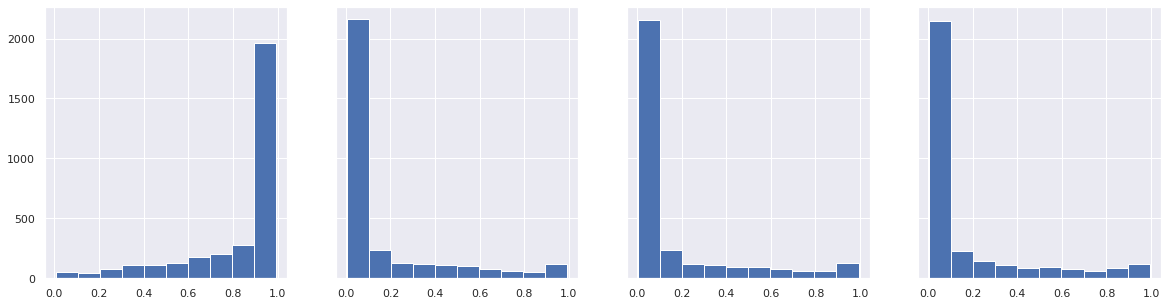

In [3]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(ncols=4, sharey=True)
df['pred_shakespeare_orig'].hist(bins=10, ax=ax1)
df['pred_shakespeare_paraphrased1'].hist(bins=10, ax=ax2)
df['pred_shakespeare_paraphrased2'].hist(bins=10, ax=ax3)
df['pred_shakespeare_paraphrased3'].hist(bins=10, ax=ax4)

In [4]:
df['orig_bucket'] = 'low'
df.loc[df['pred_shakespeare_orig']>0.1,'orig_bucket'] = 'mid'
df.loc[df['pred_shakespeare_orig']>0.9,'orig_bucket'] = 'high'

df['paraphrase_bucket1'] = 'low'
df.loc[df['pred_shakespeare_paraphrased1']>0.1,'paraphrase_bucket1'] = 'mid'
df.loc[df['pred_shakespeare_paraphrased1']>0.9,'paraphrase_bucket1'] = 'high'
df['paraphrase_bucket2'] = 'low'
df.loc[df['pred_shakespeare_paraphrased2']>0.1,'paraphrase_bucket2'] = 'mid'
df.loc[df['pred_shakespeare_paraphrased2']>0.9,'paraphrase_bucket2'] = 'high'
df['paraphrase_bucket3'] = 'low'
df.loc[df['pred_shakespeare_paraphrased3']>0.1,'paraphrase_bucket3'] = 'mid'
df.loc[df['pred_shakespeare_paraphrased3']>0.9,'paraphrase_bucket3'] = 'high'


<AxesSubplot:xlabel='paraphrase_bucket3', ylabel='Count'>

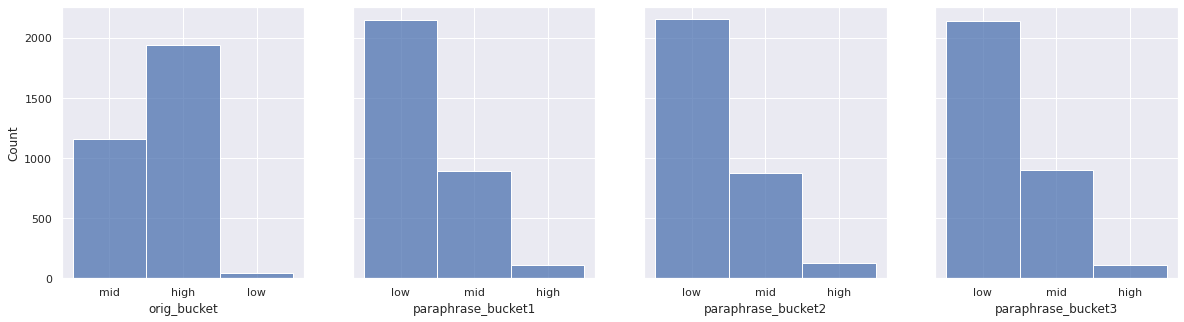

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.histplot(df, x="orig_bucket", ax=ax1)
sns.histplot(df, x="paraphrase_bucket1", ax=ax2)
sns.histplot(df, x="paraphrase_bucket2", ax=ax3)
sns.histplot(df, x="paraphrase_bucket3", ax=ax4)


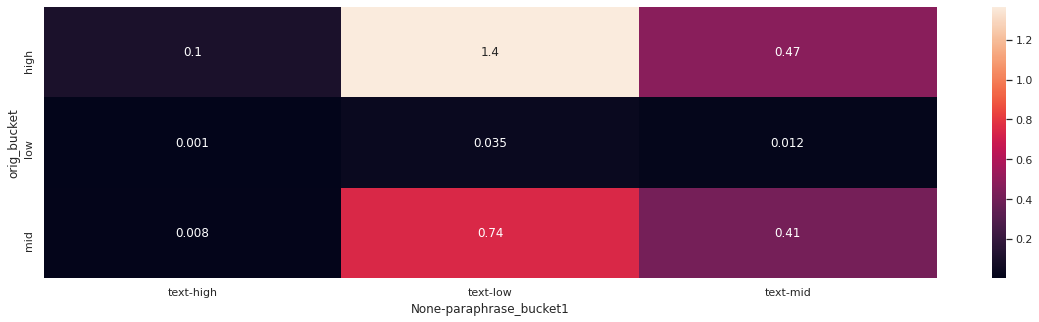

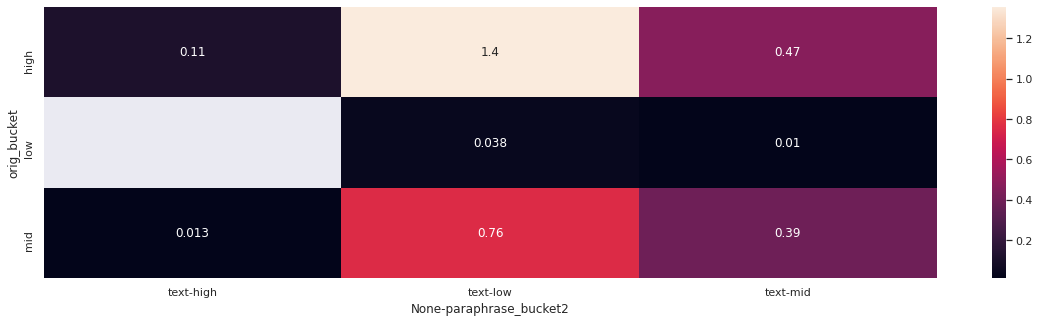

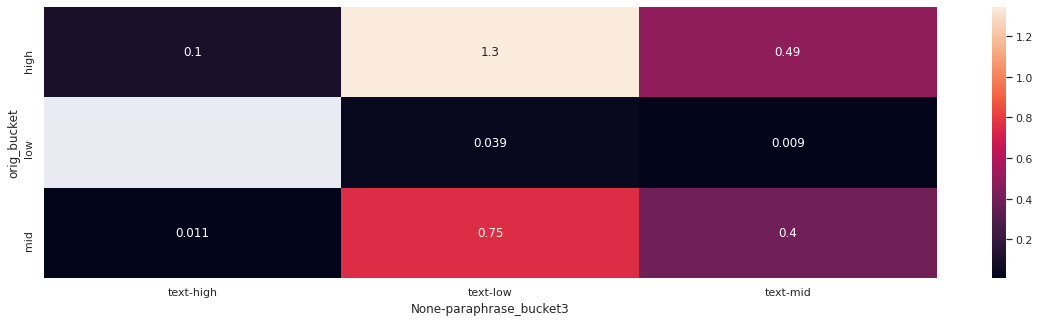

In [6]:
sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket1']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket1')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket2']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket2')/1000, annot=True)
plt.show()

sns.heatmap(df.groupby(['orig_bucket','paraphrase_bucket3']).agg({'text': 'count'}).reset_index().pivot('orig_bucket', 'paraphrase_bucket3')/1000, annot=True)
plt.show()


In [7]:
df_p1 = df[((df['orig_bucket']=='mid')&(df['paraphrase_bucket1']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket1']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket1']=='mid'))].filter(['paraphrased1','paraphrase_bucket1','text','orig_bucket'])
df_p1.columns = ['input','input_bucket','output','output_bucket']

df_p2 = df[((df['orig_bucket']=='mid')&(df['paraphrase_bucket2']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket2']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket2']=='mid'))].filter(['paraphrased2','paraphrase_bucket2','text','orig_bucket'])
df_p2.columns = ['input','input_bucket','output','output_bucket']

df_p3 = df[((df['orig_bucket']=='mid')&(df['paraphrase_bucket3']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket3']=='low'))|((df['orig_bucket']=='high')&(df['paraphrase_bucket3']=='mid'))].filter(['paraphrased3','paraphrase_bucket3','text','orig_bucket'])
df_p3.columns = ['input','input_bucket','output','output_bucket']


In [8]:
df_fin = pd.concat([df_p1, df_p2, df_p3])

In [9]:
if not os.path.exists('../../data/pseudo/shakespeare'):
    os.makedirs('../../data/pseudo/shakespeare')
df_fin.to_csv(f'../../data/pseudo/shakespeare/{type}.csv')

In [21]:
type = "dev"

df = pd.read_csv(f'../../data/processed_filtered/shakespeare/shakespeare_{type}_cross_predict_paraphrases.csv')
df.head()

,text,label,paraphrased1,paraphrased2,paraphrased3,pred_shakespeare_orig,pred_shakespeare_paraphrased1,pred_shakespeare_paraphrased2,pred_shakespeare_paraphrased3
0,"But thus, I trust, you will not marry her.",1,I'm sure you won't marry her.,but I'm sure you won't marry her.,so I'm sure you won't marry her.,0.821566,0.004811,0.004740,0.004765
1,Stand from the hearse.,1,stand in front of the hearse!,stand out of the hearse!,stand by the hearse!,0.631334,0.019826,0.209268,0.159680
2,"I have no will to wander forth of doors, Yet s...",1,"I'm not going to walk out of the door, but som...","I don't want to go out of the door, but someth...","I'm not going to go out of the door, but somet...",0.987070,0.005536,0.005621,0.005888
3,"How do you mean, removing of him?",1,how do you mean removing him?,"what do you mean, remove him?",how do you mean he's removed?,0.960118,0.185102,0.267502,0.115327
4,"O Thou, whose captain I account myself, Look o...",1,"O Thou, I'm a captain, and I'm a gracious eye ...","O Thou, I'm a captain, and I'm a gracious eye ...","O Thou, I'm a captain, and I'm a gracious man.",0.993091,0.990232,0.990249,0.990400


<AxesSubplot:>

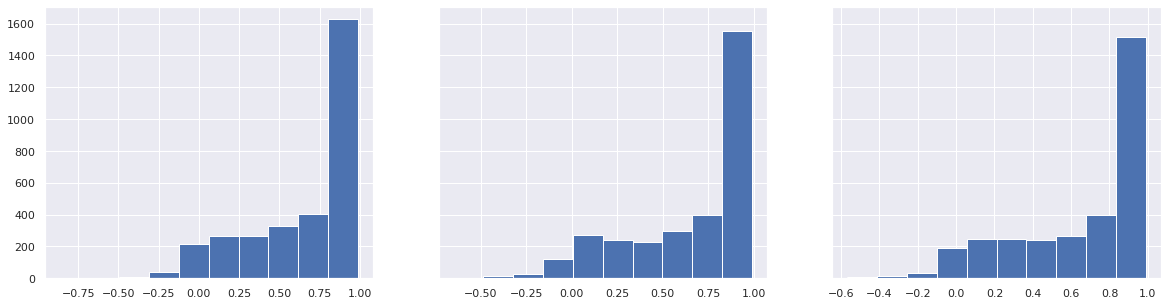

In [22]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True)
(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased1']).hist(bins=10, ax=ax1)
(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased2']).hist(bins=10, ax=ax2)
(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased3']).hist(bins=10, ax=ax3)

In [23]:
df['bucket1'] = 'skip'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased1'])>0.1,'bucket1'] = 'low'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased1'])>0.5,'bucket1'] = 'mid'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased1'])>0.9,'bucket1'] = 'high'

df['bucket2'] = 'skip'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased2'])>0.1,'bucket2'] = 'low'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased2'])>0.5,'bucket2'] = 'mid'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased2'])>0.9,'bucket2'] = 'high'

df['bucket3'] = 'skip'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased3'])>0.1,'bucket3'] = 'low'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased3'])>0.5,'bucket3'] = 'mid'
df.loc[(df['pred_shakespeare_orig']-df['pred_shakespeare_paraphrased3'])>0.9,'bucket3'] = 'high'



<AxesSubplot:xlabel='bucket3', ylabel='Count'>

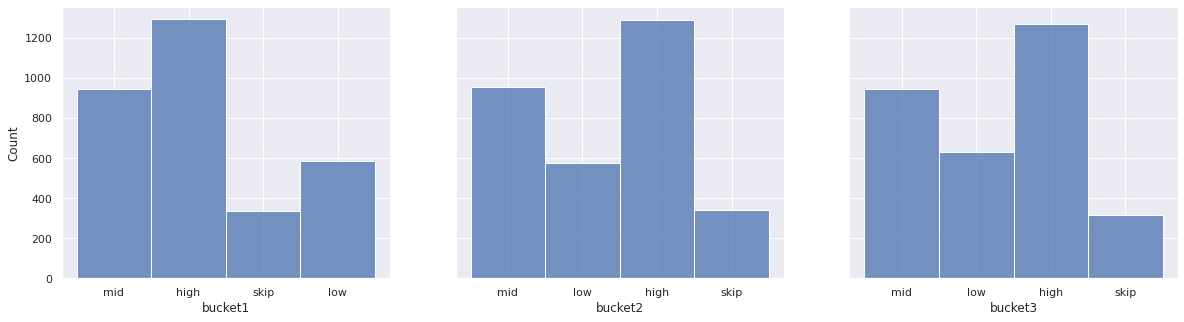

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.histplot(df, x="bucket1", ax=ax1)
sns.histplot(df, x="bucket2", ax=ax2)
sns.histplot(df, x="bucket3", ax=ax3)


In [25]:
df_p1 = df[df['bucket1']!='skip'].filter(['paraphrased1','text','bucket1'])
df_p1.columns = ['input','output','bucket']

df_p2 = df[df['bucket2']!='skip'].filter(['paraphrased2','text','bucket2'])
df_p2.columns = ['input','output','bucket']

df_p3 = df[df['bucket3']!='skip'].filter(['paraphrased3','text','bucket3'])
df_p3.columns = ['input','output','bucket']


In [26]:
df_fin = pd.concat([df_p1, df_p2, df_p3])
if not os.path.exists('../../data/pseudo/shakespeare'):
    os.makedirs('../../data/pseudo/shakespeare')
df_fin.to_csv(f'../../data/pseudo/shakespeare/{type}_diff.csv')